In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
pwd

'c:\\Users\\Asus\\Desktop\\CP_Project\\deployment'

In [3]:
df=pd.read_csv('baseball_data.csv')

##### EDA

In [4]:
empty_value_counts = df.isna().sum()
print("Number of empty values in each column:")
print(empty_value_counts)

Number of empty values in each column:
id                       0
year                     0
team                     0
average_age              0
runs_per_game            0
wins                     0
losses                   0
win_loss_percentage      0
ERA                      0
run_average_9            0
games                    0
games_started          139
games_finished         139
complete_game            0
shutouts                 0
saves                    0
innings_pitched          0
hits                     0
runs                     0
earned_runs              0
home_runs                0
walks                    0
intentional_walks      139
strikeouts               0
hit_batter               0
balks                  139
wild_pitches           139
batters_faced            0
WHIP                     0
hits_9                   0
homeruns_9               0
walks_9                  0
strikeouts_9             0
strikeout_walk           0
dtype: int64


#### Droping empty and unnecessary features


In [5]:
# Specify the columns you want to delete based on a condition
columns_to_delete = ['games_started', 'games_finished', 'intentional_walks']

# Drop the unwanted columns
df = df.drop(columns=columns_to_delete, axis=1)

# Display the DataFrame after dropping columns
print(df.head())


#filling the values with mean in some empty spots

# Calculate the mean values for "balks" and "wild_pitches"
mean_balks = df["balks"].mean()
mean_wild_pitches = df["wild_pitches"].mean()

# Replace NaN values with the mean values
df["balks"].fillna(mean_balks, inplace=True)
df["wild_pitches"].fillna(mean_wild_pitches, inplace=True)

   id  year           team  average_age  runs_per_game  wins  losses  \
0   1  2021       LG Twins         26.3           3.90    72      57   
1   2  2021         KT Wiz         28.4           4.06    75      59   
2   3  2021   Doosan Bears         27.5           4.57    70      65   
3   4  2021  Samsung Lions         28.8           4.57    75      59   
4   5  2021       NC Dinos         27.7           4.80    67      67   

   win_loss_percentage   ERA  run_average_9  ...  hit_batter  balks  \
0                0.558  3.57           3.96  ...          97    5.0   
1                0.560  3.67           4.17  ...          42    1.0   
2                0.519  4.28           4.66  ...          73    7.0   
3                0.560  4.29           4.70  ...          51    3.0   
4                0.500  4.50           4.95  ...          77    8.0   

   wild_pitches  batters_faced   WHIP  hits_9  homeruns_9  walks_9  \
0          43.0           5416  1.312     8.0         0.6      3.9   


In [6]:
empty_value_counts = df.isna().sum()

print("Number of empty values in each column:")
print(empty_value_counts)

Number of empty values in each column:
id                     0
year                   0
team                   0
average_age            0
runs_per_game          0
wins                   0
losses                 0
win_loss_percentage    0
ERA                    0
run_average_9          0
games                  0
complete_game          0
shutouts               0
saves                  0
innings_pitched        0
hits                   0
runs                   0
earned_runs            0
home_runs              0
walks                  0
strikeouts             0
hit_batter             0
balks                  0
wild_pitches           0
batters_faced          0
WHIP                   0
hits_9                 0
homeruns_9             0
walks_9                0
strikeouts_9           0
strikeout_walk         0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'team' column
df['team_number'] = label_encoder.fit_transform(df['team']) + 1

# Now, 'team_encoded' contains numerical values from 1 to 22

In [8]:
df1=df[['year',
'team_number',
'wins',
'losses',
'games',
'saves','runs_per_game',
'innings_pitched',
'earned_runs','win_loss_percentage','ERA']]

In [9]:
df1.shape

(323, 11)

In [10]:
df.columns

Index(['id', 'year', 'team', 'average_age', 'runs_per_game', 'wins', 'losses',
       'win_loss_percentage', 'ERA', 'run_average_9', 'games', 'complete_game',
       'shutouts', 'saves', 'innings_pitched', 'hits', 'runs', 'earned_runs',
       'home_runs', 'walks', 'strikeouts', 'hit_batter', 'balks',
       'wild_pitches', 'batters_faced', 'WHIP', 'hits_9', 'homeruns_9',
       'walks_9', 'strikeouts_9', 'strikeout_walk', 'team_number'],
      dtype='object')

In [11]:
df1.corr()

,year,team_number,wins,losses,games,saves,runs_per_game,innings_pitched,earned_runs,win_loss_percentage,ERA
year,1.000000,-0.067701,0.443622,0.446771,0.854590,0.456638,0.473816,0.851532,0.750070,0.000058,0.542786
team_number,-0.067701,1.000000,-0.048880,-0.041112,-0.075921,0.018237,-0.020322,-0.071069,-0.042716,-0.002228,-0.018264
wins,0.443622,-0.048880,1.000000,-0.463260,0.504590,0.706484,-0.231593,0.541756,0.103118,0.848670,-0.163310
losses,0.446771,-0.041112,-0.463260,1.000000,0.506557,-0.173008,0.703429,0.470547,0.717134,-0.847226,0.716540
games,0.854590,-0.075921,0.504590,0.506557,1.000000,0.523934,0.432730,0.988285,0.785433,-0.000052,0.522783
saves,0.456638,0.018237,0.706484,-0.173008,0.523934,1.000000,-0.109901,0.533389,0.188092,0.509287,-0.018773
runs_per_game,0.473816,-0.020322,-0.231593,0.703429,0.432730,-0.109901,1.000000,0.396734,0.887301,-0.554328,0.982736
innings_pitched,0.851532,-0.071069,0.541756,0.470547,0.988285,0.533389,0.396734,1.000000,0.756939,0.042059,0.476009
earned_runs,0.750070,-0.042716,0.103118,0.717134,0.785433,0.188092,0.887301,0.756939,1.000000,-0.355526,0.929932
win_loss_percentage,0.000058,-0.002228,0.848670,-0.847226,-0.000052,0.509287,-0.554328,0.042059,-0.355526,1.000000,-0.520309


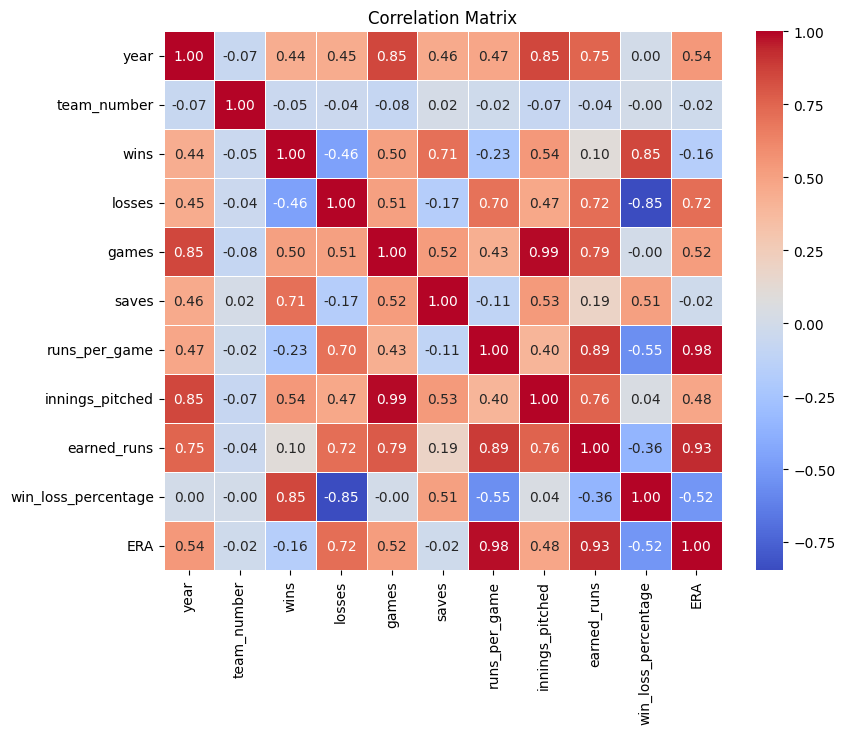

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

test 

In [13]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt

# # Assuming df1 is your DataFrame with the chosen data
# # Assuming 'win_loss_percentage' is the target variable you want to predict

# # Prepare the data
# X = df1.drop(['win_loss_percentage'], axis=1)  # Features
# y = df1['win_loss_percentage']  # Target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a pipeline with StandardScaler and Linear Regression
# from sklearn.pipeline import make_pipeline
# pipeline = make_pipeline(StandardScaler(), LinearRegression())

# # Fit the model
# pipeline.fit(X_train, y_train)

# # Predictions on the test set
# predictions = pipeline.predict(X_test)

# # Calculate Mean Squared Error
# mse = mean_squared_error(y_test, predictions)
# print(f'Mean Squared Error: {mse}')

# # Visualization of predictions vs actual values
# plt.scatter(y_test, predictions)
# plt.xlabel('Actual Win Loss Percentage')
# plt.ylabel('Predicted Win Loss Percentage')
# plt.title('Actual vs Predicted Win Loss Percentage')
# plt.show()

# # Predicting for future years (you can replace X_future with your own data)
# X_future = pd.DataFrame(...)  # Insert the features for the future years
# future_predictions = pipeline.predict(X_future)

# # Display predictions for future years
# print("Predictions for future years:")
# print(future_predictions)


In [14]:
# import joblib

# # Save the chosen model
# chosen_model = win_loss_rf_pipeline  # Change this to your chosen model
# joblib.dump(chosen_model, 'rfmodel1.pkl')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Assuming your DataFrame is named df
# Extracting data for win_loss_percentage prediction
win_loss_cols_X = df[['year', 'team_number', 'wins', 'losses', 'games', 'saves']]
win_loss_percentage_y = df['win_loss_percentage']

# Extracting data for ERA prediction
ERA_cols_X = df[['runs_per_game', 'innings_pitched', 'earned_runs', 'year', 'team_number']]
ERA_data_y = df['ERA']

# Create pipelines
win_loss_percentage_pipeline = make_pipeline(StandardScaler(), LinearRegression())
ERA_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))  # You can adjust the number of neighbors

# Split data into training and testing sets
win_loss_X_train, win_loss_X_test, win_loss_y_train, win_loss_y_test = train_test_split(
    win_loss_cols_X, win_loss_percentage_y, test_size=0.2, random_state=42
)

ERA_X_train, ERA_X_test, ERA_y_train, ERA_y_test = train_test_split(
    ERA_cols_X, ERA_data_y, test_size=0.2, random_state=42
)

# Fit models
win_loss_percentage_pipeline.fit(win_loss_X_train, win_loss_y_train)
ERA_pipeline.fit(ERA_X_train, ERA_y_train)

# Cross-validation scores
win_loss_percentage_cv_scores = cross_val_score(win_loss_percentage_pipeline, win_loss_cols_X, win_loss_percentage_y, cv=5, scoring='neg_mean_squared_error')
ERA_cv_scores = cross_val_score(ERA_pipeline, ERA_cols_X, ERA_data_y, cv=5, scoring='neg_mean_squared_error')

# Predictions
win_loss_percentage_preds = win_loss_percentage_pipeline.predict(win_loss_X_test)
ERA_preds = ERA_pipeline.predict(ERA_X_test)


# Display cross-validation scores
print("Cross-validation scores (Negative Mean Squared Error):")
print(f"Win-Loss Percentage: {np.mean(win_loss_percentage_cv_scores)}")
print(f"ERA: {np.mean(ERA_cv_scores)}")


Cross-validation scores (Negative Mean Squared Error):
Win-Loss Percentage: -0.00018038324624312254
ERA: -0.05998600500000002


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Assuming 'team' is equivalent to 'team_number'
df['team'] = df['team_number']

# Separate features and target variables for 'win_loss_percentage'
win_loss_cols_X = df[['year', 'team', 'team_number', 'wins', 'losses', 'games', 'saves']]
win_loss_percentage_y = df['win_loss_percentage']

# Separate features and target variables for 'ERA'
ERA_cols_X = df[['runs_per_game', 'innings_pitched', 'earned_runs', 'year', 'team', 'team_number']]
ERA_data_y = df['ERA']

# Define the features to be used in the pipeline
numeric_features = ['wins', 'losses', 'games', 'saves']

categorical_features = ['year', 'team', 'team_number']  # Add more if needed

# Create the transformers for the numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the Random Forest regressor
win_loss_rf_model = RandomForestRegressor(random_state=42)

# Create the Linear Regression model
win_loss_lr_model = LinearRegression()

# Create the KNN regressor
win_loss_knn_model = KNeighborsRegressor()

# Create the pipelines
win_loss_rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('regressor', win_loss_rf_model)])

win_loss_lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('regressor', win_loss_lr_model)])

win_loss_knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', win_loss_knn_model)])

# Function to perform cross-validation and return the mean squared error
def perform_cross_validation(pipeline, X, y):
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    return -np.mean(scores)

# Split data for 'win_loss_percentage' model
win_loss_X_train, win_loss_X_test, win_loss_y_train, win_loss_y_test = train_test_split(
    win_loss_cols_X, win_loss_percentage_y, test_size=0.2, random_state=42
)

# Perform cross-validation for Random Forest
win_loss_rf_cv_score = perform_cross_validation(win_loss_rf_pipeline, win_loss_X_train, win_loss_y_train)

# Perform cross-validation for Linear Regression
win_loss_lr_cv_score = perform_cross_validation(win_loss_lr_pipeline, win_loss_X_train, win_loss_y_train)

# Perform cross-validation for KNN
win_loss_knn_cv_score = perform_cross_validation(win_loss_knn_pipeline, win_loss_X_train, win_loss_y_train)

# Print cross-validation scores
print("Cross-validation scores (Negative Mean Squared Error):")
print(f"Random Forest: {win_loss_rf_cv_score}")
print(f"Linear Regression: {win_loss_lr_cv_score}")
print(f"KNN: {win_loss_knn_cv_score}")


Cross-validation scores (Negative Mean Squared Error):
Random Forest: 0.0003614652803393665
Linear Regression: 0.00019187367218104838
KNN: 0.0012780181840120663


In [17]:
import joblib

# Save the chosen model


chosen_model = win_loss_rf_model  # Change this to your chosen model
joblib.dump(chosen_model, 'rfmodel.pkl')

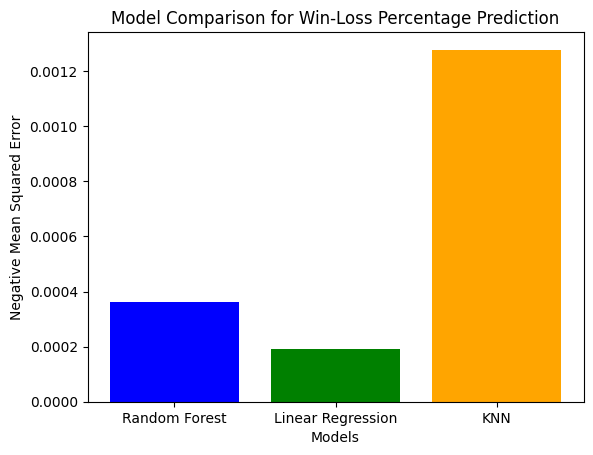

In [18]:
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'Linear Regression', 'KNN']

# Negative mean squared error scores
scores = [win_loss_rf_cv_score, win_loss_lr_cv_score, win_loss_knn_cv_score]

# Create a bar plot
plt.bar(models, scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Negative Mean Squared Error')
plt.title('Model Comparison for Win-Loss Percentage Prediction')
plt.show()


#### selecting features for win_loss and ERA

In [19]:
# win_los_cols_X=df[['year',
# 'team','team_number',
# 'wins',
# 'losses',
# 'games',
# 'saves']]
# win_loss_percentage_y=df['win_loss_percentage']

# ERA_cols_X=df[[
# 'runs_per_game',
# 'innings_pitched',
# 'earned_runs',
# 'year',
# 'team','team_number']]
# ERA_data_y=df['ERA']

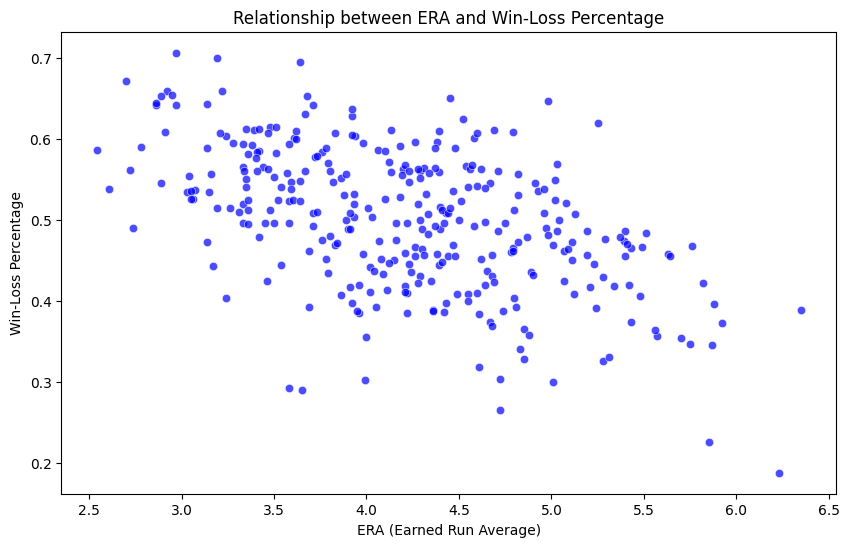

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for a more visually appealing plot

# Assuming your DataFrame is named df1
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='ERA', y='win_loss_percentage', data=df, color='blue', alpha=0.7)

# Adding labels and title
plt.title('Relationship between ERA and Win-Loss Percentage')
plt.xlabel('ERA (Earned Run Average)')
plt.ylabel('Win-Loss Percentage')

# Show the plot
plt.show()


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns

# # Assuming your DataFrame is named df
# # Extracting data for win_loss_percentage prediction
win_loss_cols_X = df[['year', 'team_number', 'wins', 'losses', 'games', 'saves']]
win_loss_percentage_y = df['win_loss_percentage']

# # Extracting data for ERA prediction
ERA_cols_X = df[['runs_per_game', 'innings_pitched', 'earned_runs', 'year', 'team_number']]
ERA_data_y = df['ERA']

# # Create pipelines
win_loss_percentage_pipeline = make_pipeline(StandardScaler(), LinearRegression())
ERA_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))  # You can adjust the number of neighbors

# # Split data into training and testing sets
win_loss_X_train, win_loss_X_test, win_loss_y_train, win_loss_y_test = train_test_split(
     win_loss_cols_X, win_loss_percentage_y, test_size=0.2, random_state=42
 )

ERA_X_train, ERA_X_test, ERA_y_train, ERA_y_test = train_test_split(
     ERA_cols_X, ERA_data_y, test_size=0.2, random_state=42
 )

# # Fit models
win_loss_percentage_pipeline.fit(win_loss_X_train, win_loss_y_train)
ERA_pipeline.fit(ERA_X_train, ERA_y_train)

# # Cross-validation scores
win_loss_percentage_cv_scores = cross_val_score(win_loss_percentage_pipeline, win_loss_cols_X, win_loss_percentage_y, cv=5, scoring='neg_mean_squared_error')
ERA_cv_scores = cross_val_score(ERA_pipeline, ERA_cols_X, ERA_data_y, cv=5, scoring='neg_mean_squared_error')

 # Predictions
win_loss_percentage_preds = win_loss_percentage_pipeline.predict(win_loss_X_test)
ERA_preds = ERA_pipeline.predict(ERA_X_test)


# # Display cross-validation scores
print("Cross-validation scores (Negative Mean Squared Error):")
print(f"Win-Loss Percentage: {np.mean(win_loss_percentage_cv_scores)}")
print(f"ERA: {np.mean(ERA_cv_scores)}")


Cross-validation scores (Negative Mean Squared Error):
Win-Loss Percentage: -0.00018038324624312254
ERA: -0.05998600500000002


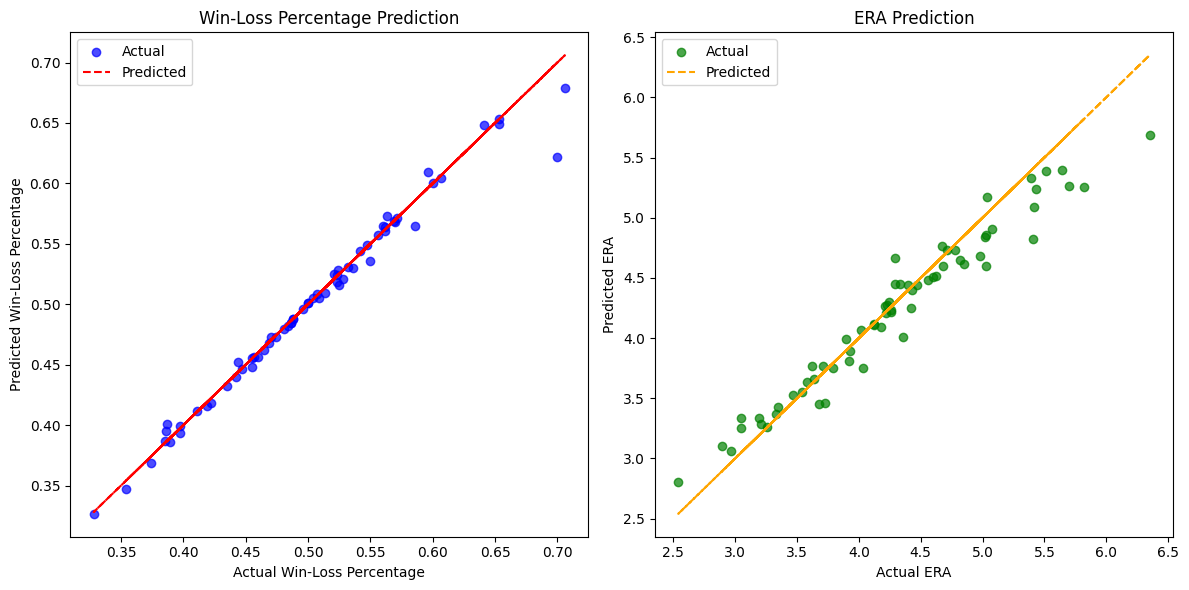

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot for win_loss_percentage
plt.subplot(1, 2, 1)
plt.scatter(win_loss_y_test, win_loss_percentage_preds, alpha=0.7, label='Actual', color='blue')
plt.plot(win_loss_y_test, win_loss_y_test, color='red', linestyle='--', label='Predicted')
plt.title('Win-Loss Percentage Prediction')
plt.xlabel('Actual Win-Loss Percentage')
plt.ylabel('Predicted Win-Loss Percentage')
plt.legend()

# # Plot for ERA
plt.subplot(1, 2, 2)
plt.scatter(ERA_y_test, ERA_preds, alpha=0.7, label='Actual', color='green')
plt.plot(ERA_y_test, ERA_y_test, color='orange', linestyle='--', label='Predicted')
plt.title('ERA Prediction')
plt.xlabel('Actual ERA')
plt.ylabel('Predicted ERA')
plt.legend()

plt.tight_layout()
plt.show()


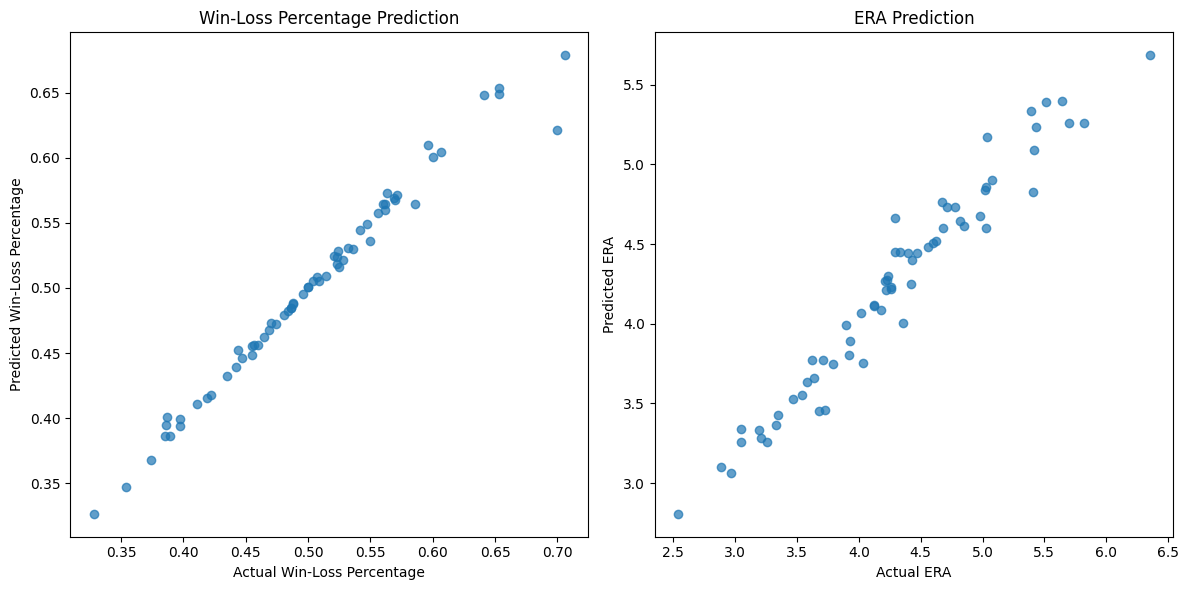

In [23]:
# # Visualize changes
plt.figure(figsize=(12, 6))

# # Plot for win_loss_percentage
plt.subplot(1, 2, 1)
plt.scatter(win_loss_y_test, win_loss_percentage_preds, alpha=0.7)
plt.title('Win-Loss Percentage Prediction')
plt.xlabel('Actual Win-Loss Percentage')
plt.ylabel('Predicted Win-Loss Percentage')

# # Plot for ERA
plt.subplot(1, 2, 2)
plt.scatter(ERA_y_test, ERA_preds, alpha=0.7)
plt.title('ERA Prediction')
plt.xlabel('Actual ERA')
plt.ylabel('Predicted ERA')

plt.tight_layout()
plt.show()


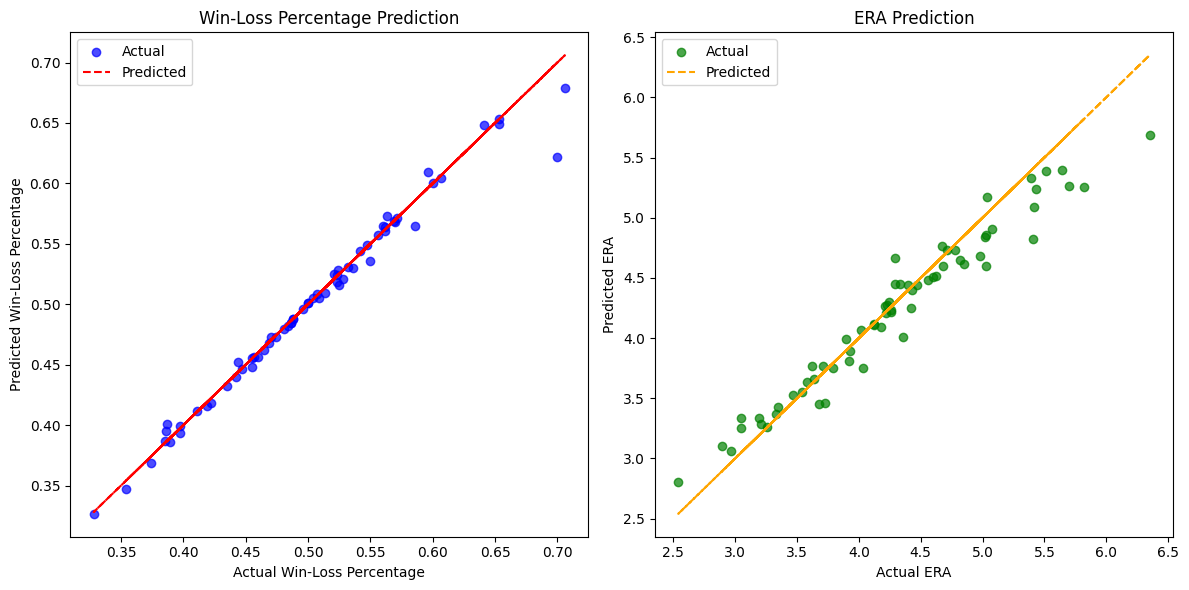

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot for Win-Loss Percentage
plt.subplot(1, 2, 1)
plt.scatter(win_loss_y_test, win_loss_percentage_preds, alpha=0.7, label='Actual', color='blue')
plt.plot(win_loss_y_test, win_loss_y_test, color='red', linestyle='--', label='Predicted')
plt.title('Win-Loss Percentage Prediction')
plt.xlabel('Actual Win-Loss Percentage')
plt.ylabel('Predicted Win-Loss Percentage')
plt.legend()

# # Plot for ERA
plt.subplot(1, 2, 2)
plt.scatter(ERA_y_test, ERA_preds, alpha=0.7, label='Actual', color='green')
plt.plot(ERA_y_test, ERA_y_test, color='orange', linestyle='--', label='Predicted')
plt.title('ERA Prediction')
plt.xlabel('Actual ERA')
plt.ylabel('Predicted ERA')
plt.legend()

plt.tight_layout()
plt.show()


In [25]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Assuming you have imported win_loss_y_test, win_loss_percentage_preds, ERA_y_test, ERA_preds

# fig = plt.figure(figsize=(15, 15))
# ax = fig.add_subplot(111, projection='3d')

# # Plotting actual values
# ax.scatter(win_loss_y_test, ERA_y_test, c='blue', marker='o', label='Actual Win-Loss Percentage and ERA')

# # Plotting predicted values
# ax.scatter(win_loss_percentage_preds, ERA_preds, c='red', marker='^', label='Predicted Win-Loss Percentage and ERA')

# ax.set_xlabel('Win-Loss Percentage')
# ax.set_ylabel('ERA')
# ax.set_zlabel('Frequency')

# ax.set_title('Actual and Predicted Values for Win-Loss Percentage and ERA')

# plt.legend()
# plt.show()


In [26]:
# Display cross-validation scores
print("Cross-validation scores (Mean Squared Error):")
print(f"Win-Loss Percentage: {-np.mean(win_loss_percentage_cv_scores)}")
print(f"ERA: {-np.mean(ERA_cv_scores)}")

Cross-validation scores (Mean Squared Error):
Win-Loss Percentage: 0.00018038324624312254
ERA: 0.05998600500000002


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Create pipelines
win_loss_percentage_rf_pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))
ERA_rf_pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))

# Fit Random Forest models
win_loss_rf_model.fit(win_loss_X_train, win_loss_y_train)
# ERA_rf_pipeline.fit(ERA_X_train, ERA_y_train)

# Evaluate Random Forest models
win_loss_percentage_rf_train_preds = win_loss_rf_model.predict(win_loss_X_train)
win_loss_percentage_rf_test_preds = win_loss_rf_model.predict(win_loss_X_test)

# ERA_rf_train_preds = ERA_rf_pipeline.predict(ERA_X_train)
# ERA_rf_test_preds = ERA_rf_pipeline.predict(ERA_X_test)

# Calculate MSE for Random Forest models
win_loss_percentage_rf_train_mse = mean_squared_error(win_loss_y_train, win_loss_percentage_rf_train_preds)
win_loss_percentage_rf_test_mse = mean_squared_error(win_loss_y_test, win_loss_percentage_rf_test_preds)

# ERA_rf_train_mse = mean_squared_error(ERA_y_train, ERA_rf_train_preds)
# ERA_rf_test_mse = mean_squared_error(ERA_y_test, ERA_rf_test_preds)

# Display results
print("Random Forest Model Performance:")
print(f"Win-Loss Percentage - Train MSE: {win_loss_percentage_rf_train_mse}")
print(f"Win-Loss Percentage - Test MSE: {win_loss_percentage_rf_test_mse}")
# print(f"ERA - Train MSE: {ERA_rf_train_mse}")
# print(f"ERA - Test MSE: {ERA_rf_test_mse}")

# Linear Regression Model Performance
# win_loss_percentage_lr_train_preds = win_loss_percentage_pipeline.predict(win_loss_X_train)
# win_loss_percentage_lr_test_preds = win_loss_percentage_pipeline.predict(win_loss_X_test)

# ERA_lr_train_preds = ERA_pipeline.predict(ERA_X_train)
# ERA_lr_test_preds = ERA_pipeline.predict(ERA_X_test)

# # Calculate MSE for Linear Regression models
# win_loss_percentage_lr_train_mse = mean_squared_error(win_loss_y_train, win_loss_percentage_lr_train_preds)
# win_loss_percentage_lr_test_mse = mean_squared_error(win_loss_y_test, win_loss_percentage_lr_test_preds)

# ERA_lr_train_mse = mean_squared_error(ERA_y_train, ERA_lr_train_preds)
# ERA_lr_test_mse = mean_squared_error(ERA_y_test, ERA_lr_test_preds)

# # Display results
# print("\nLinear Regression Model Performance:")
# print(f"Win-Loss Percentage - Train MSE: {win_loss_percentage_lr_train_mse}")
# print(f"Win-Loss Percentage - Test MSE: {win_loss_percentage_lr_test_mse}")
# print(f"ERA - Train MSE: {ERA_lr_train_mse}")
# print(f"ERA - Test MSE: {ERA_lr_test_mse}")


Random Forest Model Performance:
Win-Loss Percentage - Train MSE: 3.975427093023261e-05
Win-Loss Percentage - Test MSE: 0.00023540527076922985


In [30]:
win_loss_percentage_rf_train_preds

array([0.46567, 0.50555, 0.54968, 0.559  , 0.44573, 0.61853, 0.44993,
       0.55945, 0.42965, 0.53029, 0.6261 , 0.56314, 0.41351, 0.49567,
       0.63894, 0.55933, 0.50479, 0.5142 , 0.4795 , 0.61058, 0.59222,
       0.3795 , 0.494  , 0.51315, 0.46633, 0.5437 , 0.59959, 0.46978,
       0.3577 , 0.46033, 0.31655, 0.58576, 0.53171, 0.41794, 0.46206,
       0.47918, 0.44328, 0.44596, 0.51031, 0.53289, 0.54096, 0.53215,
       0.54346, 0.24754, 0.33418, 0.5867 , 0.58699, 0.35777, 0.41572,
       0.46747, 0.57706, 0.50983, 0.67944, 0.49128, 0.61222, 0.49453,
       0.37663, 0.55902, 0.47125, 0.36583, 0.54612, 0.49399, 0.46271,
       0.51169, 0.41962, 0.64069, 0.47354, 0.50237, 0.4556 , 0.51495,
       0.52199, 0.33684, 0.55932, 0.60768, 0.53505, 0.42382, 0.52437,
       0.58608, 0.58968, 0.41174, 0.43387, 0.56413, 0.40754, 0.52584,
       0.60954, 0.5237 , 0.6242 , 0.41043, 0.45489, 0.30772, 0.5604 ,
       0.53635, 0.45771, 0.57974, 0.58806, 0.47691, 0.51733, 0.49434,
       0.61034, 0.48